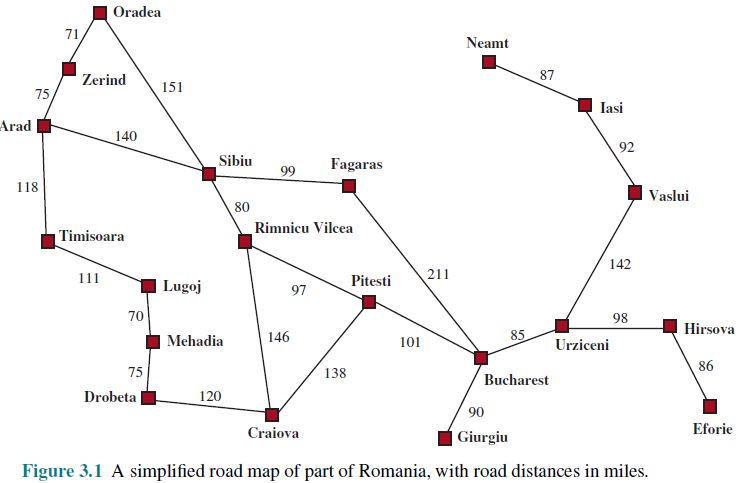

In [1]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

# Uniform Cost Search

In [2]:
from queue import PriorityQueue


def ucs(startingNode, destinationNode):
     expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    snode = (0,startingNode,[startingNode]) #(g(n) = path cost, city name, path)
    frontier.put(snode)
    
    while not frontier.empty():
        unode = frontier.get() # select a node for expansion
        u = unode[1] 
        if u == destinationNode:# goal test            
            print(unode)
            print(expanded)
            return unode[2] # path
        expanded.append(u)
        for v in romanian_map[u].keys():#expanding            
            if v not in expanded:
                cost = unode[0] + romanian_map[u][v]
                path = unode[2] + [v]
                frontier.put((cost,v,path))
                print(v+ ", Cost: " +str(cost))
    print('Failed')

In [3]:
ucs('Zerind', 'Bucharest') # change source and destination

Arad, Cost: 75
Oradea, Cost: 71
Sibiu, Cost: 222
Sibiu, Cost: 215
Timisoara, Cost: 193
Lugoj, Cost: 304
Fagaras, Cost: 314
Rimnicu, Cost: 295
Fagaras, Cost: 321
Rimnicu, Cost: 302
Craiova, Cost: 441
Pitesti, Cost: 392
Craiova, Cost: 448
Pitesti, Cost: 399
Mehadia, Cost: 374
Bucharest, Cost: 525
Bucharest, Cost: 532
Drobeta, Cost: 449
Craiova, Cost: 530
Bucharest, Cost: 493
Craiova, Cost: 537
Bucharest, Cost: 500
Drobeta, Cost: 561
Drobeta, Cost: 568
(493, 'Bucharest', ['Zerind', 'Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'])
['Zerind', 'Oradea', 'Arad', 'Timisoara', 'Sibiu', 'Sibiu', 'Rimnicu', 'Rimnicu', 'Lugoj', 'Fagaras', 'Fagaras', 'Mehadia', 'Pitesti', 'Pitesti', 'Craiova', 'Craiova', 'Drobeta']


['Zerind', 'Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

In [4]:
# insert simulation of the ouput

# Greedy Best First Search

In [4]:
# SLD heuristic for the destination (Bucharest)
h = {'Arad': 366,'Zerind':  374,'Oradea': 380,'Sibiu': 253,
    'Timisoara': 329,'Lugoj': 244,'Mehadia': 241,'Drobeta': 242,
    'Craiova': 160,'Rimnicu': 193,'Fagaras': 176,'Pitesti': 100,
    'Bucharest': 0,'Giurgiu': 77,'Urziceni': 80,'Hirsova': 151,
    'Eforie': 161,'Vaslui': 199,'Iasi': 226,'Neamt': 234
} 

In [5]:
from queue import PriorityQueue

def gbfs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    snode = (h[startingNode],startingNode,[startingNode],0) # (h, city, path, path cost)
    frontier.put(snode)

    while not frontier.empty():
        unode = frontier.get() 
        u = unode[1]
        
        if u== destinationNode:#Goal Test            
            print(unode)
            print(expanded)
            return unode[2] #path
        expanded.append(u)
        for v in romanian_map[u].keys():            
            if v not in expanded:
                cost = unode[3] + romanian_map[u][v]
                path = unode[2]+[v]
                frontier.put((h[v],v,path, cost))   
    print('Failed')

In [14]:
gbfs('Arad', 'Bucharest') # change source only

(0, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'], 450)
['Arad', 'Sibiu', 'Fagaras']


['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

In [8]:
# insert simulation of the ouput

# A*

In [6]:
def a_star(startingNode, destinationNode):

    frontier = PriorityQueue()
    s = 0;
    node = (h[startingNode]+s,startingNode,[startingNode],0)
    frontier.put(node)
    visited = {}
    astart_traversal_output = []

    
    for city in romanian_map.keys():
        visited[city] = False
        
    visited[startingNode] = True
    
    
    while not frontier.empty():
        node = frontier.get()
        u = node[1]
        print("\nSelected node : ")
        print(u)
        astart_traversal_output.append(u)

        if u== destinationNode:
            print(node[2])
            print(node[3])
            print(astart_traversal_output)
            break
        visited[u] = True
        
        for v in romanian_map[u].keys():#expanding            
            if not visited[v]:
                d = node[3] + romanian_map[u][v]
                p = node[2]+[v]
                
                print("\nPath : ")
                print(p)
                
                print("Distance : ")
                print(d)
                
                s=d
                frontier.put((h[v]+s,v,p,d))        

a_star('Arad', 'Bucharest')


Selected node : 
Arad

Path : 
['Arad', 'Sibiu']
Distance : 
140

Path : 
['Arad', 'Zerind']
Distance : 
75

Path : 
['Arad', 'Timisoara']
Distance : 
118

Selected node : 
Sibiu

Path : 
['Arad', 'Sibiu', 'Oradea']
Distance : 
291

Path : 
['Arad', 'Sibiu', 'Fagaras']
Distance : 
239

Path : 
['Arad', 'Sibiu', 'Rimnicu']
Distance : 
220

Selected node : 
Rimnicu

Path : 
['Arad', 'Sibiu', 'Rimnicu', 'Craiova']
Distance : 
366

Path : 
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti']
Distance : 
317

Selected node : 
Fagaras

Path : 
['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Distance : 
450

Selected node : 
Pitesti

Path : 
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Craiova']
Distance : 
455

Path : 
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
Distance : 
418

Selected node : 
Bucharest
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
418
['Arad', 'Sibiu', 'Rimnicu', 'Fagaras', 'Pitesti', 'Bucharest']


In [10]:
# insert simulation of the ouput